## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all necessary libraries

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Week 4/Day 6/EdStatsData.csv')
df2=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Week 4/Day 6/EdStatsCountry.csv')

In [ ]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


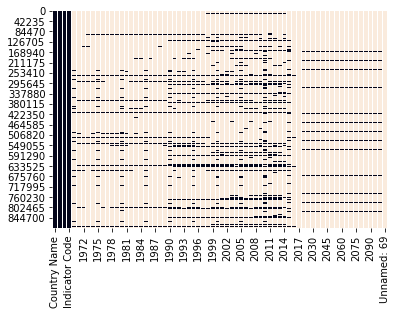

In [ ]:
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [ ]:
df['Indicator Name'].value_counts()

PASEC: Distribution of 6th grade reading scores: 5th Percentile Score                                                 242
PASEC: 6th grade students by mathematics proficiency level (%). Level 2                                               242
Africa Dataset: Percentage of primary schools with access to potable water (%)                                        242
PIAAC: Young adults by numeracy proficiency level (%). Level 3                                                        242
Barro-Lee: Average years of total schooling, age 25+, total                                                           242
                                                                                                                     ... 
TIMSS: Distribution of 4th Grade Mathematics Scores: 95th Percentile Score                                            242
Net intake rate to Grade 1 of primary education by over-age entrants (+1 year), female (%)                            242
UIS: Net attendance rate

In [ ]:
df1970=df[['Indicator Name','Country Name']][~df['1970'].isna()]
df1970['Country Name'].value_counts().describe()

count    241.000000
mean     299.950207
std      197.936073
min        2.000000
25%       56.000000
50%      411.000000
75%      423.000000
max      749.000000
Name: Country Name, dtype: float64

(array([ 64.,  17.,  15.,   1.,   0., 107.,  20.,   7.,   6.,   4.]),
 array([  2. ,  76.7, 151.4, 226.1, 300.8, 375.5, 450.2, 524.9, 599.6,
        674.3, 749. ]),
 <a list of 10 Patch objects>)

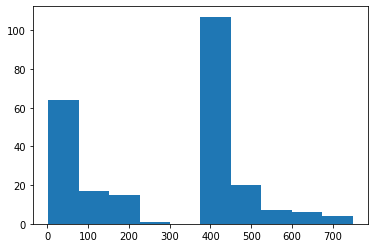

In [ ]:
plt.hist(df1970['Country Name'].value_counts())

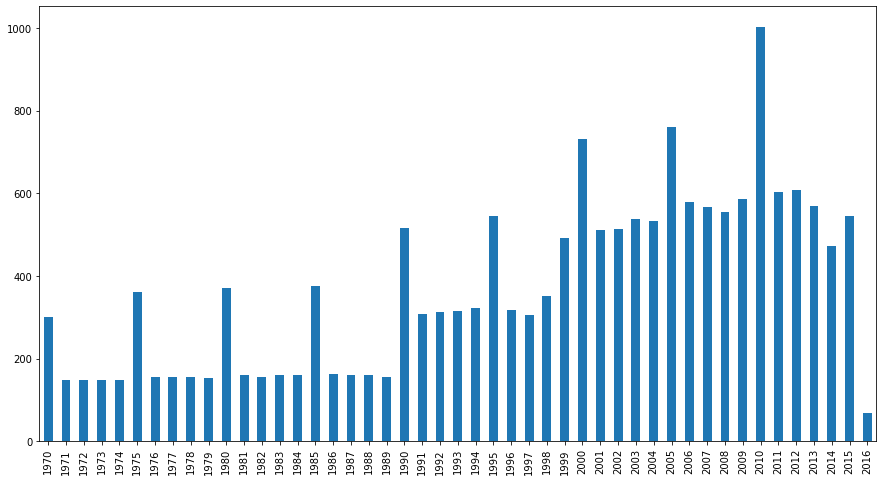

In [ ]:
avg_indicator={}
for i in df.iloc[:,4:51]:
  dfi=df['Country Name'][~df[i].isna()]
  avg_indicator[i]=dfi.value_counts().mean()
pd.Series(avg_indicator).plot.bar(figsize=(15,8))


from this plot we can conclude that number of indicators reported from 1970 to 1990 doubled in 1990 to 1999 and trippled in 1999 to 2015.

Time Zone 1970-1999


In [ ]:
df_1970_1990=df.iloc[:,:25]
df_1970_1990.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819


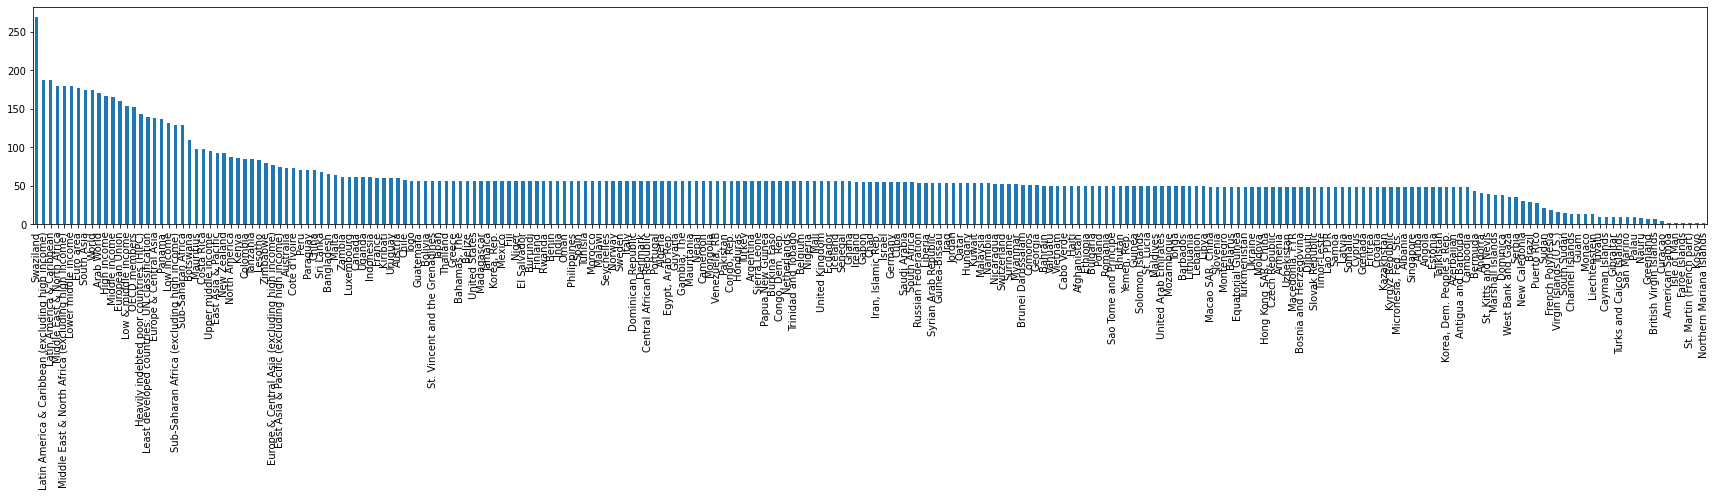

In [ ]:
df_1970_1990.dropna()['Country Name'].value_counts().plot.bar(figsize=(30,4))

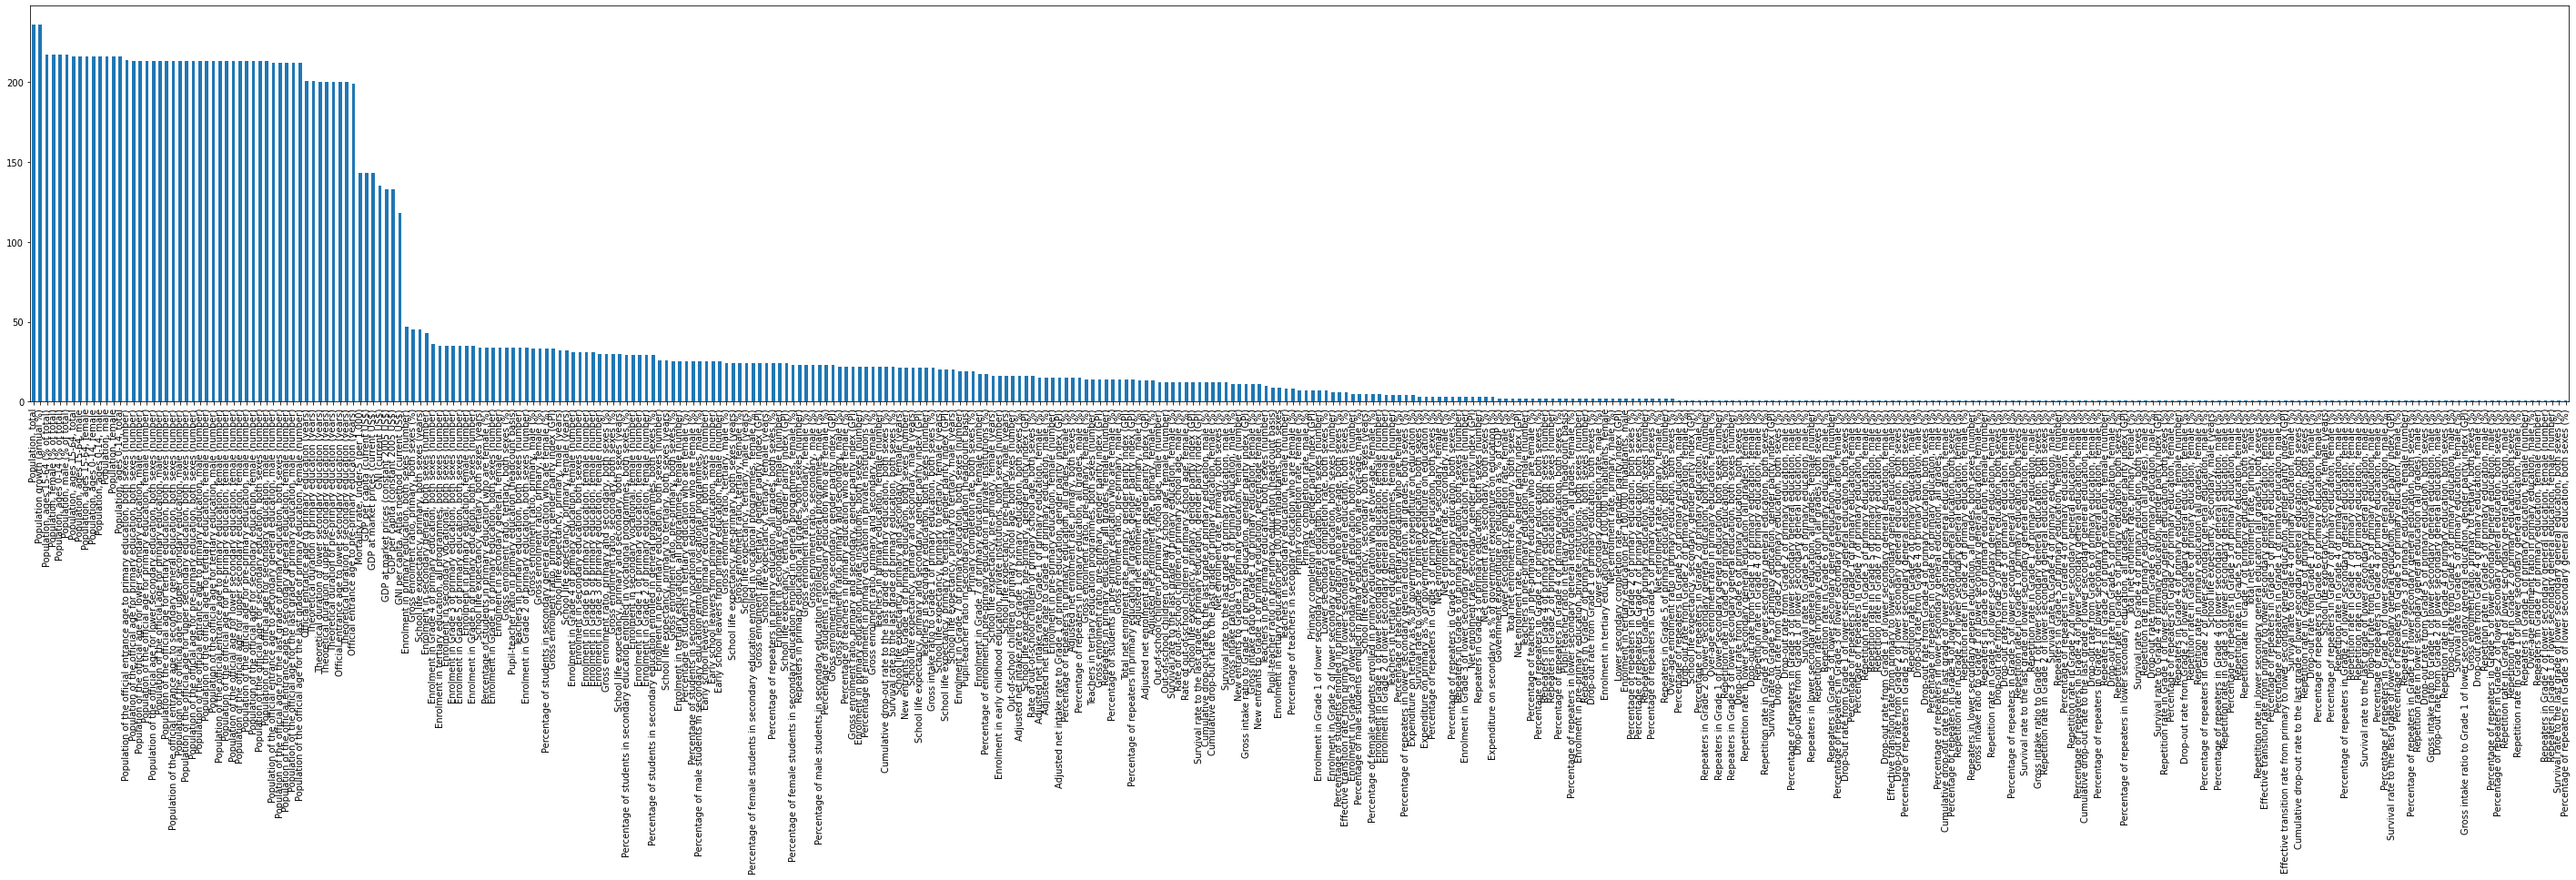

In [ ]:
df_1970_1990.dropna()['Indicator Name'].value_counts().plot.bar(figsize=(50,8))

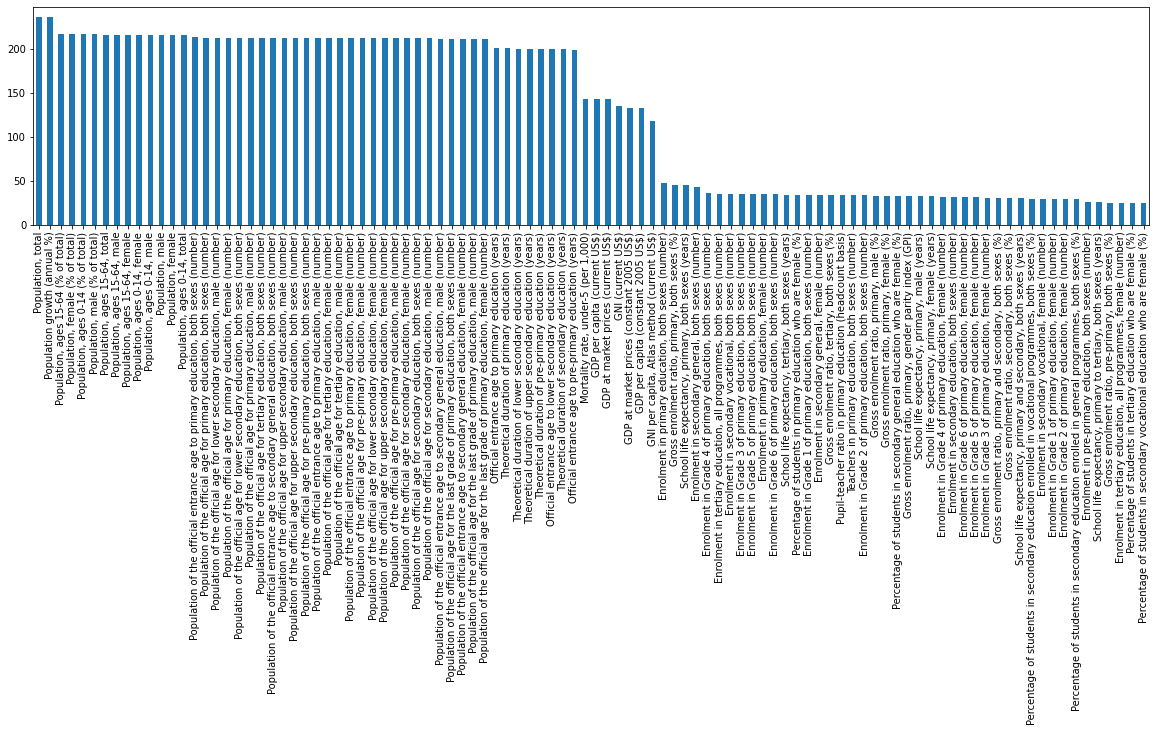

In [ ]:
df_1970_1990.dropna()['Indicator Name'].value_counts()[:100].plot.bar(figsize=(20,4)) # checking usefull indicators

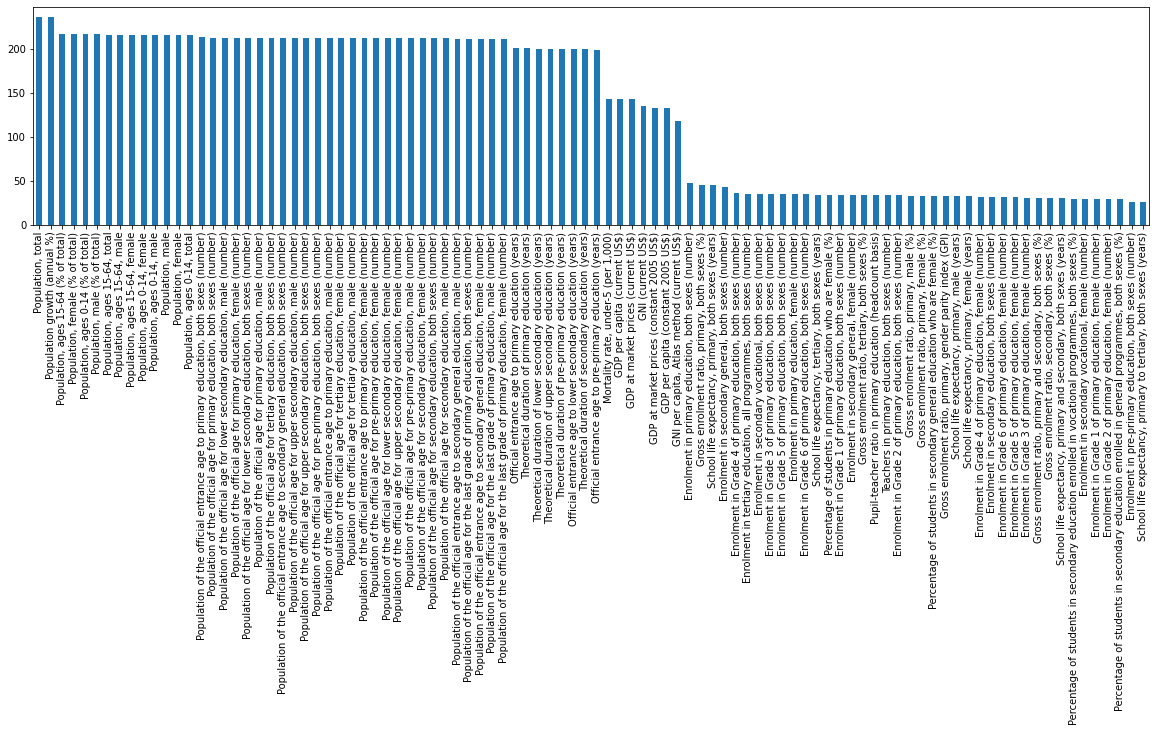

In [ ]:
df_1970_1990.dropna()['Indicator Name'].value_counts()[df_1970_1990.dropna()['Indicator Name'].value_counts()>25].plot.bar(figsize=(20,4))

In [ ]:
df_1970_1990=df.iloc[:,:25]
df_1970_1990=df_1970_1990.dropna( how='all',
                    subset=list(df_1970_1990.iloc[:,4:21]))#eliminating rows if all the year cols values are null

In [ ]:
df_1970_1990=df_1970_1990[df_1970_1990['Indicator Name'].str.contains("literacy")]
df_1975_1990=df_1970_1990.drop(df_1970_1990.iloc[:,4:9], axis=1)
df_1975_1990=df_1975_1990[df_1975_1990['Indicator Name'].str.contains("(%)")]# removing indicators having with GPI (gender parity index)
df_1975_1990=df_1975_1990.dropna( how='all',
                    subset=list(df_1975_1990.iloc[:,4:20]))
df_1975_1990.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 20 to 886929
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    728 non-null    object 
 1   Country Code    728 non-null    object 
 2   Indicator Name  728 non-null    object 
 3   Indicator Code  728 non-null    object 
 4   1975            45 non-null     float64
 5   1976            66 non-null     float64
 6   1977            9 non-null      float64
 7   1978            18 non-null     float64
 8   1979            57 non-null     float64
 9   1980            168 non-null    float64
 10  1981            149 non-null    float64
 11  1982            57 non-null     float64
 12  1983            18 non-null     float64
 13  1984            36 non-null     float64
 14  1985            159 non-null    float64
 15  1986            144 non-null    float64
 16  1987            108 non-null    float64
 17  1988            111 non-null   

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [ ]:
df_1975_1990.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
20,Arab World,ARB,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.593472,54.593472,54.593472,54.593472,54.593472,54.593472
21,Arab World,ARB,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.089874,41.089874,41.089874,41.089874,41.089874,41.089874
23,Arab World,ARB,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.255676,67.255676,67.255676,67.255676,67.255676,67.255676
3661,Arab World,ARB,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.035446,73.035446,73.035446,73.035446,73.035446,73.035446
3662,Arab World,ARB,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.423077,63.423077,63.423077,63.423077,63.423077,63.423077


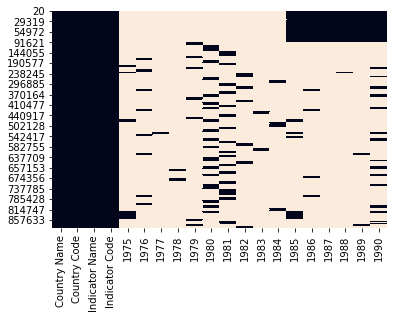

In [ ]:
sns.heatmap(df_1975_1990.isnull(),cbar=False)

From above heatmap, one can see that literacy rates were reorted irregularly in all countries. 

In [ ]:
y=[]
for i in range(len(df_1975_1990. index)):
 x=np.round(df_1975_1990.iloc[i, 4:20].mean(),2)
 y.append(x)
df_1975_1990["1975-1990 in %"]=y
df_1975_1990.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1975-1990 in %
20,Arab World,ARB,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.593472,54.593472,54.593472,54.593472,54.593472,54.593472,54.59
21,Arab World,ARB,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.089874,41.089874,41.089874,41.089874,41.089874,41.089874,41.09
23,Arab World,ARB,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.255676,67.255676,67.255676,67.255676,67.255676,67.255676,67.26
3661,Arab World,ARB,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.035446,73.035446,73.035446,73.035446,73.035446,73.035446,73.04
3662,Arab World,ARB,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.423077,63.423077,63.423077,63.423077,63.423077,63.423077,63.42


 Literacy rates from different indicators like youth literacy rate, adult literacy rates etc are 
filtered out  and avraged over respective time zones.

In [ ]:
df_1975_1990.drop(df_1975_1990.iloc[:,4:20], axis=1,inplace=True)
timezone1_literacy_rate=df_1975_1990.groupby(['Country Name','Country Code'])['1975-1990 in %'].mean().reset_index()
timezone1_literacy_rate.head(5)

,Country Name,Country Code,1975-1990 in %
0,Afghanistan,AFG,17.703333
1,American Samoa,ASM,95.904444
2,Arab World,ARB,63.566667
3,Argentina,ARG,92.443333
4,Bahrain,BHR,55.607778


In [ ]:
fig = px.choropleth(timezone1_literacy_rate, locations="Country Code",color="1975-1990 in %",color_continuous_scale="Viridis",labels={'1975-1990 in %':'literacy rate'})
fig.show()

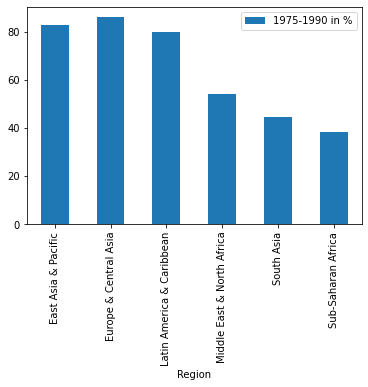

In [ ]:
y=[]
for i in range(len(timezone1_literacy_rate. index)):
 x=timezone1_literacy_rate.iloc[i,1]
 value=df2.loc[df2['Country Code'] == x, 'Region'].iloc[0]
 y.append(value)
timezone1_literacy_rate['Region']=y
timezone1_literacy_rate.dropna()
timezone1_literacy_rate.groupby('Region')['1975-1990 in %'].mean().reset_index().set_index('Region').plot.bar()

In [ ]:
df_1970_1990_2=df.iloc[:,:25]
df_1970_1990_2=df_1970_1990_2.dropna( how='all',subset=list(df_1970_1990_2.iloc[:,4:21]))
df_1970_1990_2=df_1970_1990_2[df_1970_1990_2['Indicator Name'].str.contains("Gross enrolment")]
df_1970_1990_2=df_1970_1990_2[df_1970_1990_2['Indicator Name'].isin(list(df_1970_1990_2['Indicator Name'].value_counts()[:125].index))]
df_1970_1990_2=df_1970_1990_2[df_1970_1990_2['Indicator Name'].str.contains("(%)")]
del df_1970_1990_2['1970']
y=[]
for i in range(len(df_1970_1990_2. index)):
 x=np.round(df_1970_1990_2.iloc[i, 4:20].mean(),2)
 y.append(x)
df_1970_1990_2["1970-1990 in %"]=y
df_1970_1990_2.drop(df_1970_1990_2.iloc[:,4:24], axis=1,inplace=True)
timezone1_enrolment_rate=df_1970_1990_2.groupby(['Country Name','Country Code'])['1970-1990 in %'].mean().reset_index()
fig = px.choropleth(timezone1_enrolment_rate, locations="Country Code",color="1970-1990 in %",color_continuous_scale="Viridis",labels={'1970-1990 in %':'enrolment rate'})
fig.show()


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



Time Zone 1990-1999



In [ ]:
df_1990_1999=df.iloc[:,:34]
df_1990_1999.drop(df_1990_1999.iloc[:,4:24], axis=1,inplace=True)#dropping 1970 to 1989
df_1990_1999=df_1990_1999.dropna( how='all',
                    subset=list(df_1990_1999.iloc[:,4:14]))
df_1990_1999=df_1990_1999[df_1990_1999['Indicator Name'].str.contains("literacy")]
df_1990_1999=df_1990_1999[df_1990_1999['Indicator Name'].str.contains("(%)")]
y=[]
for i in range(len(df_1990_1999. index)):
 x=np.round(df_1990_1999.iloc[i, 4:14].mean(),2)
 y.append(x)
df_1990_1999["1990-1999 in %"]=y
df_1990_1999.drop(df_1990_1999.iloc[:,4:14], axis=1,inplace=True)
timezone2_literacy_rate=df_1990_1999.groupby(['Country Name','Country Code'])['1990-1999 in %'].mean().reset_index()


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [ ]:
fig = px.choropleth(timezone2_literacy_rate, locations="Country Code",color="1990-1999 in %",color_continuous_scale="Viridis",labels={'1990-1999 in %':'literacy rate'})
fig.show()

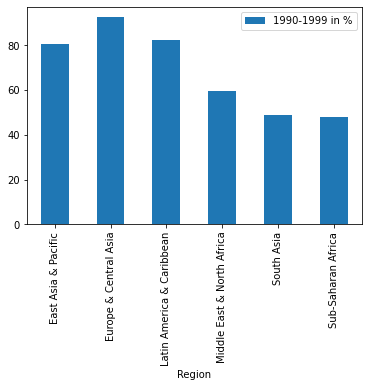

In [ ]:
l=[]
for i in range(len(timezone2_literacy_rate. index)):
 x=timezone2_literacy_rate.iloc[i,1]
 value=df2.loc[df2['Country Code'] == x, 'Region'].iloc[0]
 l.append(value)
timezone2_literacy_rate['Region']=l
timezone2_literacy_rate.dropna()
timezone2_literacy_rate.groupby('Region')['1990-1999 in %'].mean().reset_index().set_index('Region').plot.bar()

In [ ]:
df_1990_1999_2=df.iloc[:,:34]
df_1990_1999_2.drop(df_1990_1999_2.iloc[:,4:24], axis=1,inplace=True)#dropping 1970 to 1989
df_1990_1999_2=df_1990_1999_2.dropna( how='all',subset=list(df_1990_1999_2.iloc[:,4:14]))
df_1990_1999_2=df_1990_1999_2[df_1990_1999_2['Indicator Name'].str.contains("Gross enrolment")]
df_1990_1999_2=df_1990_1999_2[df_1990_1999_2['Indicator Name'].isin(list(df_1990_1999_2['Indicator Name'].value_counts()[:160].index))]
df_1990_1999_2=df_1990_1999_2[df_1990_1999_2['Indicator Name'].str.contains("(%)")]
l=[]
for i in range(len(df_1990_1999_2. index)):
 x=np.round(df_1990_1999_2.iloc[i, 4:14].mean(),2)
 l.append(x)
df_1990_1999_2["1990-1999 in %"]=l
df_1990_1999_2.drop(df_1990_1999_2.iloc[:,4:14], axis=1,inplace=True)
timezone2_enrolment_rate=df_1990_1999_2.groupby(['Country Name','Country Code'])['1990-1999 in %'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [ ]:
fig = px.choropleth(timezone2_enrolment_rate, locations="Country Code",color="1990-1999 in %",color_continuous_scale="Viridis",labels={'1990-1999 in %':'enrolment rate'})
fig.show()

Time zone 1999-2015

In [ ]:
df_1999_2015=df.iloc[:,:50]
df_1999_2015.drop(df_1999_2015.iloc[:,4:24], axis=1,inplace=True)
df_1999_2015=df_1999_2015.dropna( how='all',
                    subset=list(df_1999_2015.iloc[:,4:30]))
df_1999_2015=df_1999_2015[df_1999_2015['Indicator Name'].str.contains("literacy")]
df_1999_2015=df_1999_2015[~df_1999_2015['Indicator Name'].str.contains("PIAAC")]#removing PIAAC indicators
df_1999_2015=df_1999_2015[df_1999_2015['Indicator Name'].str.contains("(%)")]
y=[]
for i in range(len(df_1999_2015. index)):
 x=np.round(df_1999_2015.iloc[i, 4:30].mean(),2)
 y.append(x)
df_1999_2015["1999-2015 in %"]=y
df_1999_2015.drop(df_1999_2015.iloc[:,4:30], axis=1,inplace=True)
timezone3_literacy_rate=df_1999_2015.groupby(['Country Name','Country Code'])['1999-2015 in %'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [ ]:
fig = px.choropleth(timezone3_literacy_rate, locations="Country Code",color="1999-2015 in %",color_continuous_scale="Viridis",labels={'1999-2015 in %':'literacy rate'})
fig.show()

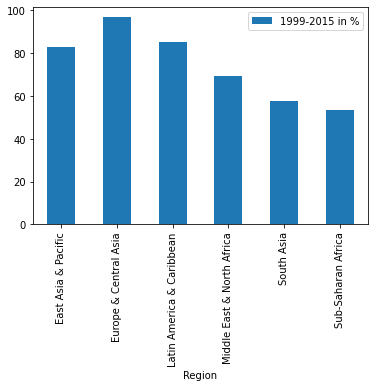

In [ ]:
t=[]
for i in range(len(timezone3_literacy_rate. index)):
 x=timezone3_literacy_rate.iloc[i,1]
 value=df2.loc[df2['Country Code'] == x, 'Region'].iloc[0]
 t.append(value)
timezone3_literacy_rate['Region']=t
timezone3_literacy_rate.dropna()
timezone3_literacy_rate.groupby('Region')['1999-2015 in %'].mean().reset_index().set_index('Region').plot.bar()

In [ ]:
df_1999_2015_2=df.iloc[:,:50]
df_1999_2015_2.drop(df_1999_2015_2.iloc[:,4:24], axis=1,inplace=True)
df_1999_2015_2=df_1999_2015_2.dropna( how='all',
                    subset=list(df_1999_2015_2.iloc[:,4:30]))
df_1999_2015_2=df_1999_2015_2[df_1999_2015_2['Indicator Name'].str.contains("Gross enrolment")]
df_1999_2015_2=df_1999_2015_2[df_1999_2015_2['Indicator Name'].isin(list(df_1999_2015_2['Indicator Name'].value_counts()[:200].index))]
df_1999_2015_2=df_1999_2015_2[df_1999_2015_2['Indicator Name'].str.contains("(%)")]
z=[]
for i in range(len(df_1999_2015_2. index)):
 x=np.round(df_1999_2015_2.iloc[i, 4:30].mean(),2)
 z.append(x)
df_1999_2015_2["1999-2015 in %"]=z
df_1999_2015_2.drop(df_1999_2015_2.iloc[:,4:30], axis=1,inplace=True)
timezone3_literacy_rate=df_1999_2015_2.groupby(['Country Name','Country Code'])['1999-2015 in %'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [ ]:
fig = px.choropleth(timezone3_literacy_rate, locations="Country Code",color="1999-2015 in %",color_continuous_scale="Viridis",labels={'1999-2015 in %':'enrolment rate'})
fig.show()

Time Zone 2020-2100

In [ ]:
df_2020=df.drop(df.iloc[:,4:52],axis=1)
df_2020=df_2020.iloc[:,:21]
df_2020.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


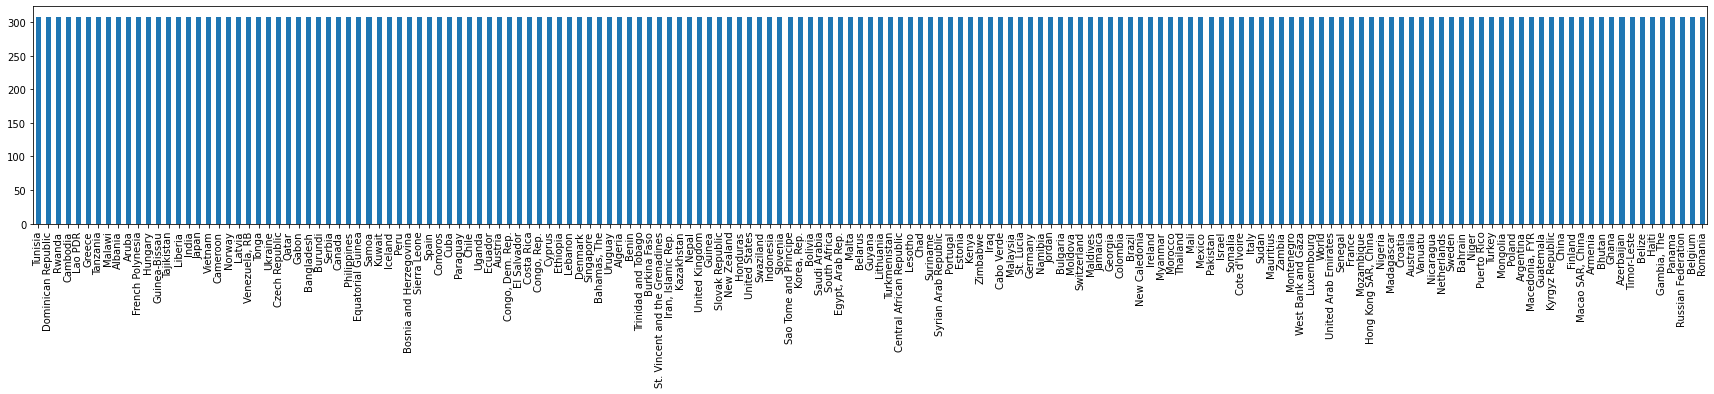

In [ ]:
df_2020.dropna()['Country Name'].value_counts().plot.bar(figsize=(30,4))

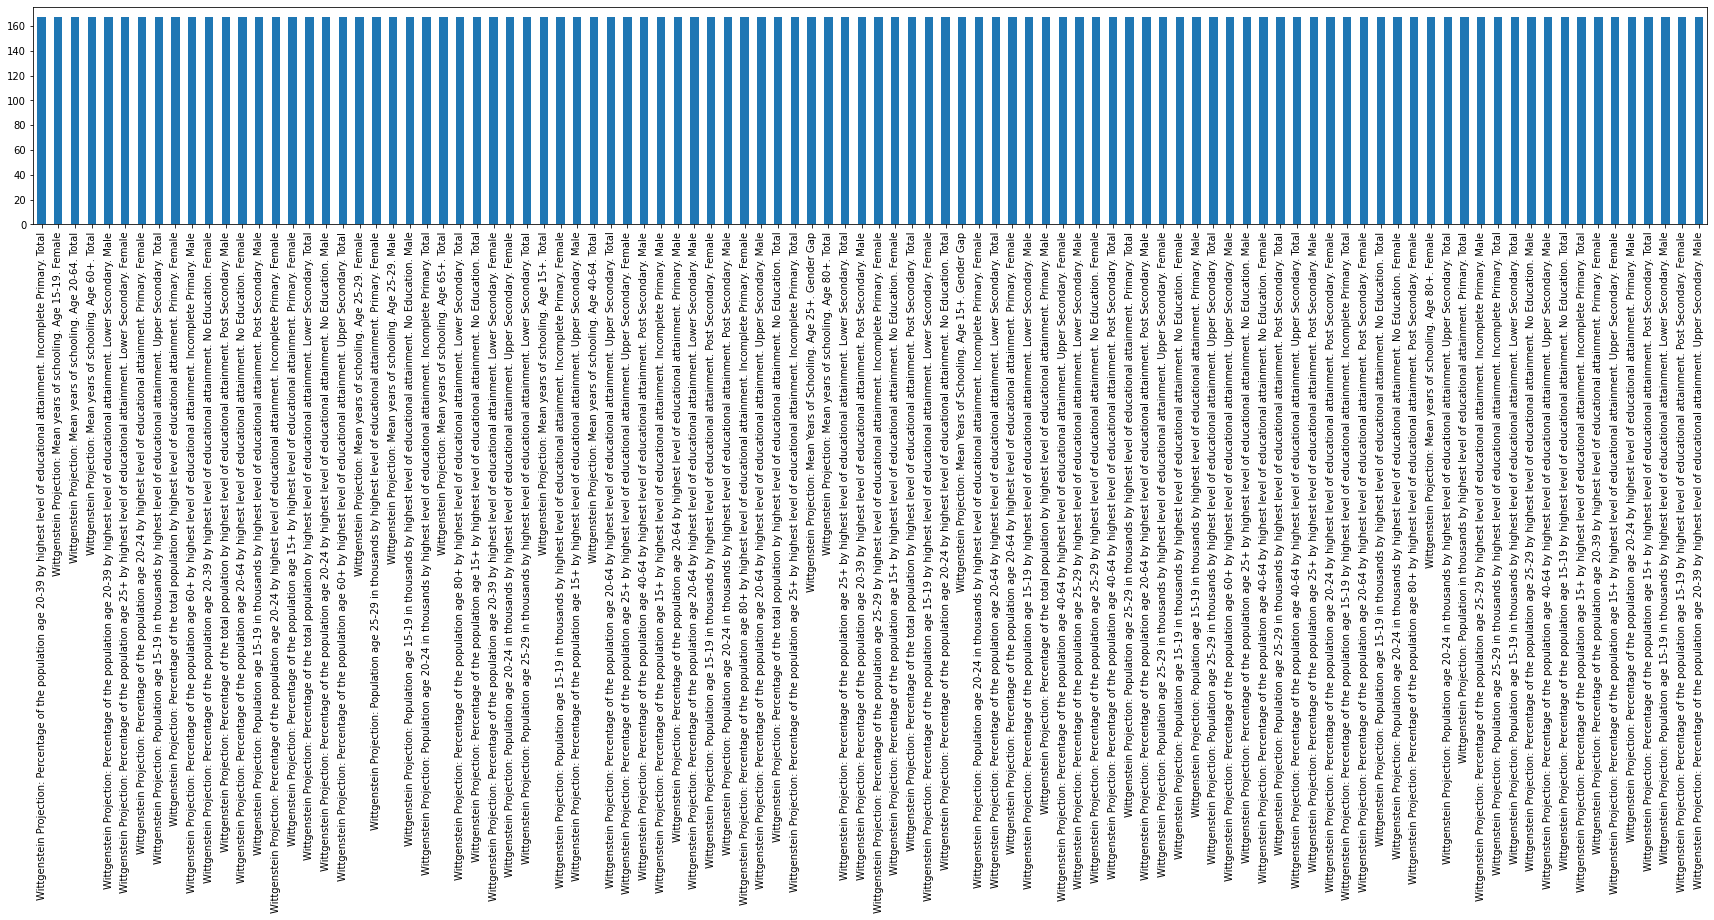

In [ ]:
df_2020.dropna()['Indicator Name'].value_counts()[:100].plot.bar(figsize=(30,4))

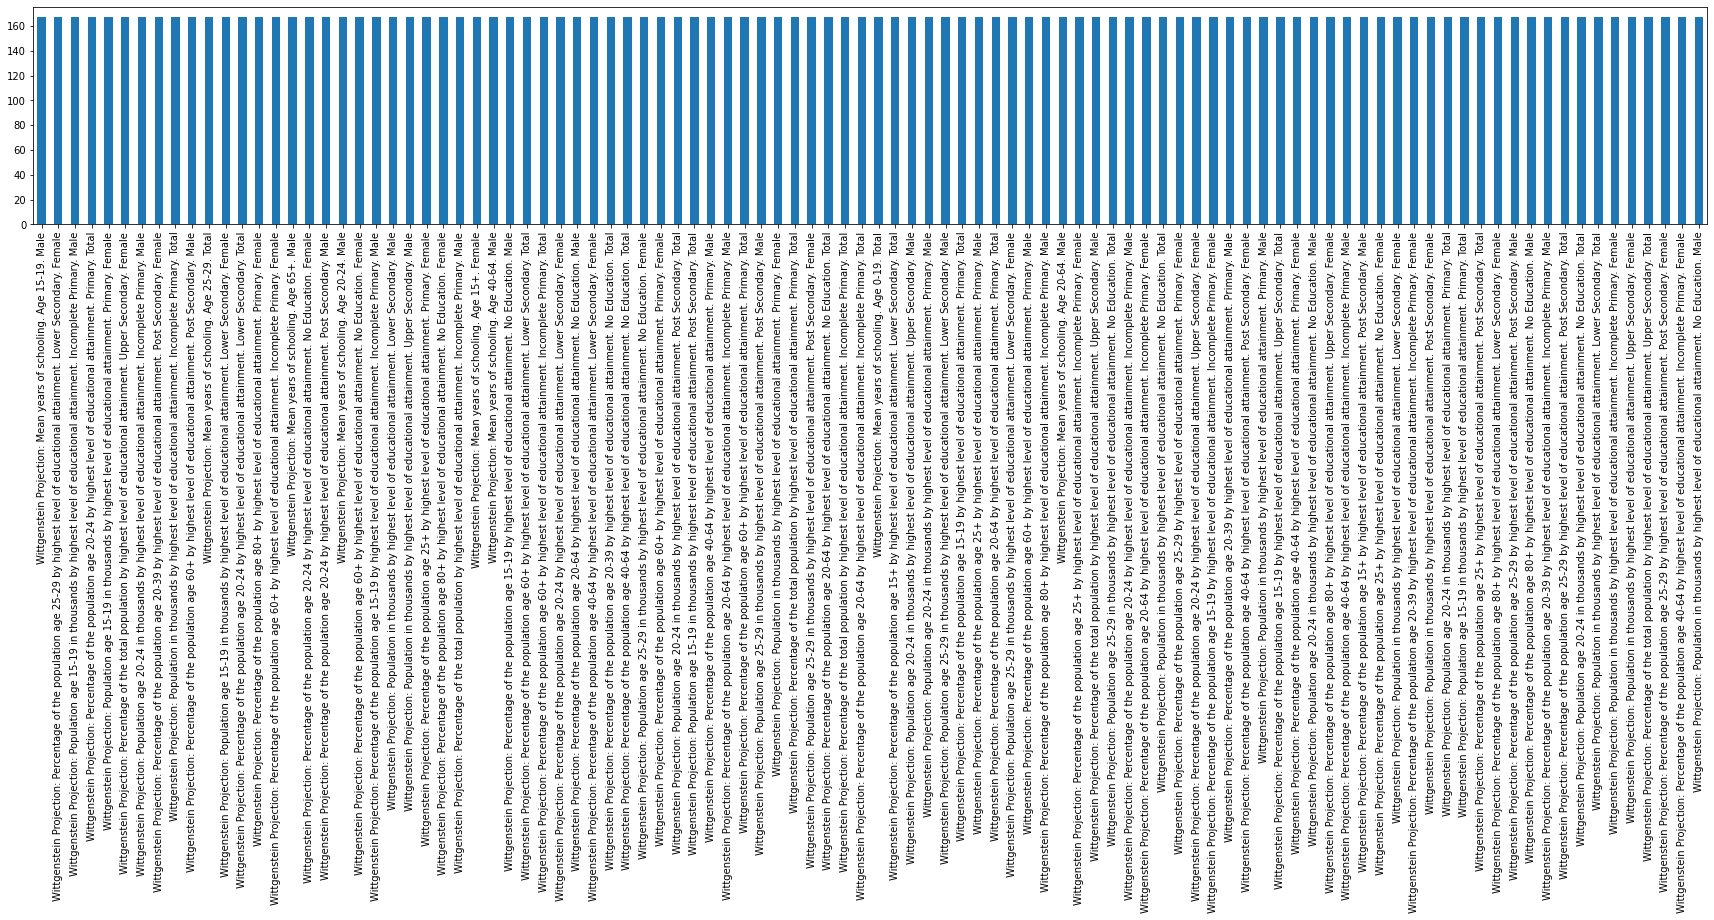

In [ ]:
df_2020.dropna()['Indicator Name'].value_counts()[100:200].plot.bar(figsize=(30,4))

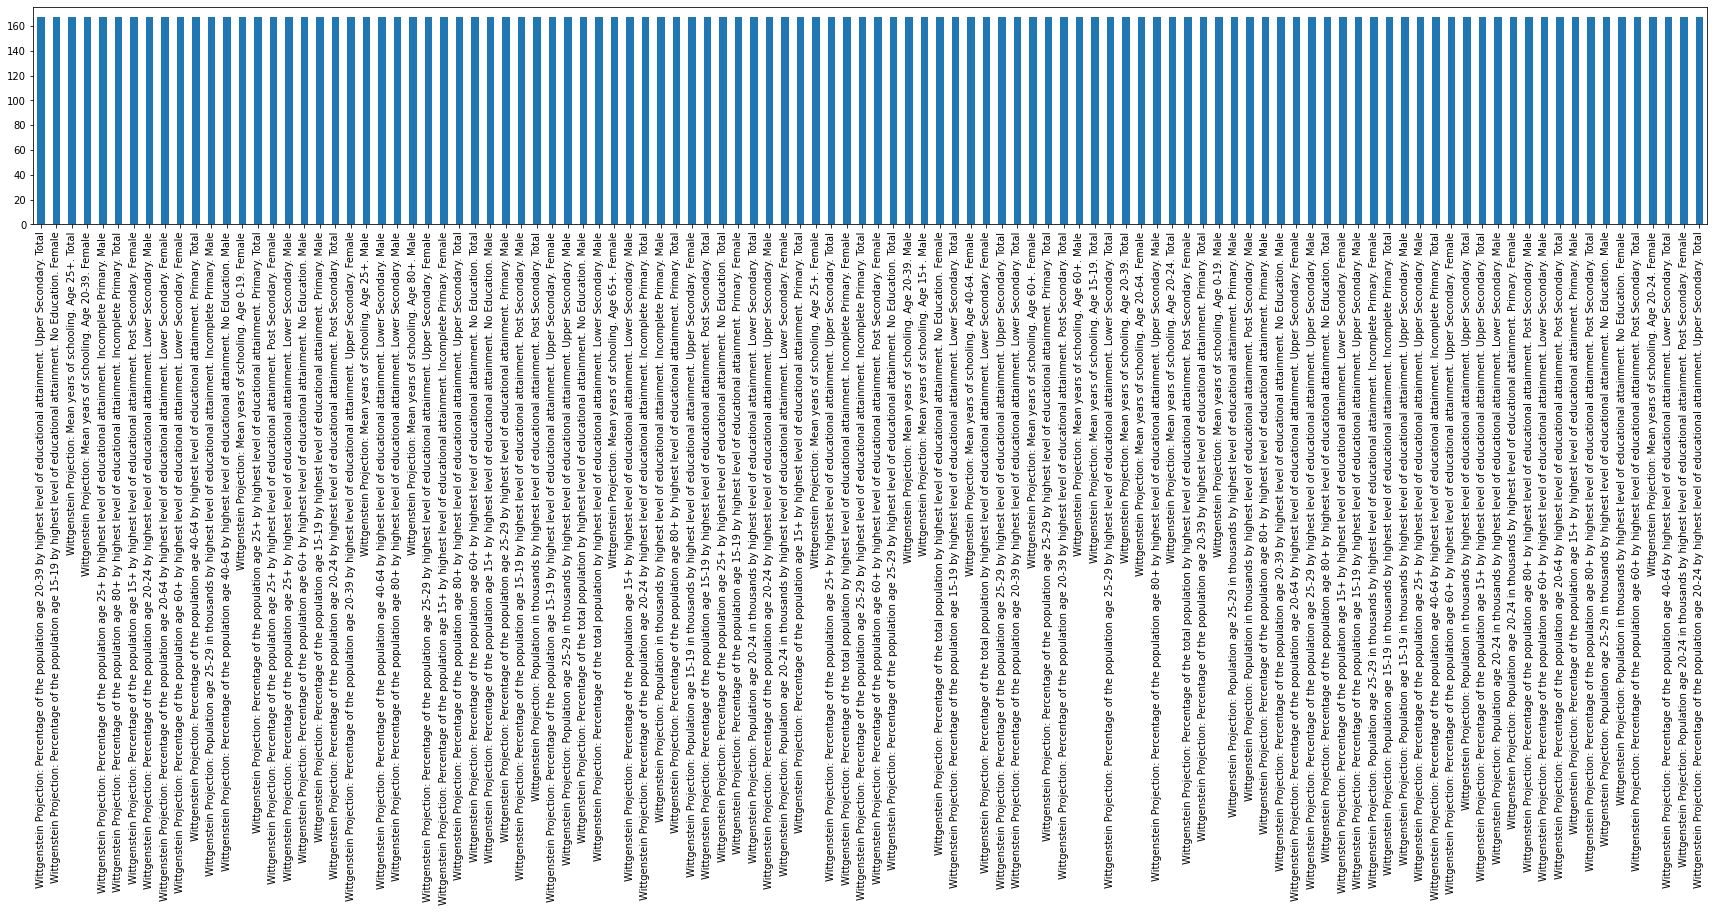

In [ ]:
df_2020.dropna()['Indicator Name'].value_counts()[200:].plot.bar(figsize=(30,4))

In [ ]:
df_2020=df_2020.dropna( how='all',
                    subset=list(df_2020.iloc[:,4:21]))
df_2020=df_2020[df_2020['Indicator Name'].str.contains("Mean years")]
m=[]
for i in range(len(df_2020. index)):
 x=np.round(df_2020.iloc[i, 4:21].mean(),2)
 m.append(x)
df_2020["2020-2100 in %"]=m
df_2020.drop(df_2020.iloc[:,4:21], axis=1,inplace=True)
future_analysis=df_2020.groupby(['Country Name','Country Code'])['2020-2100 in %'].mean().reset_index()
future_analysis.drop(future_analysis.loc[future_analysis['Country Name']=='World'].index, inplace=True)


In [ ]:
fig = px.choropleth(future_analysis, locations="Country Code",color="2020-2100 in %",color_continuous_scale="Viridis",labels={'2020-2100 in %':'mean years of education'})
fig.show()

Education Analysis in India

In [ ]:
df_india=df[df['Country Name']=='India']
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665 entries, 414145 to 417809
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3665 non-null   object 
 1   Country Code    3665 non-null   object 
 2   Indicator Name  3665 non-null   object 
 3   Indicator Code  3665 non-null   object 
 4   1970            416 non-null    float64
 5   1971            261 non-null    float64
 6   1972            141 non-null    float64
 7   1973            171 non-null    float64
 8   1974            159 non-null    float64
 9   1975            498 non-null    float64
 10  1976            156 non-null    float64
 11  1977            152 non-null    float64
 12  1978            152 non-null    float64
 13  1979            107 non-null    float64
 14  1980            495 non-null    float64
 15  1981            177 non-null    float64
 16  1982            147 non-null    float64
 17  1983            147 non-nu

In [ ]:
df_india_p=df_india.iloc[:,:50] # from 1970 to 2015
df_india_f=df_india.drop(df_india.iloc[:,4:52],axis=1) # from 2020 to 2100
df_india_f=df_india_f.iloc[:,:21]
df_india_f.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
414145,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414146,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414147,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414148,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414149,India,IND,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



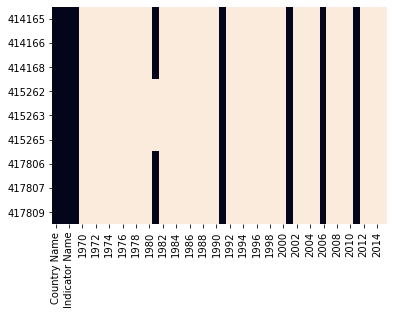

In [ ]:
df_india_literacy=df_india_p.dropna( how='all',
                    subset=list(df_india_p.iloc[:,4:50]))
df_india_literacy=df_india_literacy[df_india_literacy['Indicator Name'].str.contains("literacy")]
df_india_literacy=df_india_literacy[~df_india_literacy['Indicator Name'].str.contains("PIAAC")]#removing PIAAC indicators
df_india_literacy=df_india_literacy[df_india_literacy['Indicator Name'].str.contains("(%)")]
sns.heatmap(df_india_literacy.isnull(),cbar=False)

In [ ]:
df_india_literacy=df_india_literacy.dropna( how='all', axis=1)
df_india_literacy

,Country Name,Country Code,Indicator Name,Indicator Code,1981,1991,2001,2006,2011
414165,India,IND,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,40.763592,48.222069,61.01456,62.75447,69.30256
414166,India,IND,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,25.676250,33.729530,47.84210,50.82376,59.27732
414168,India,IND,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,54.841019,61.641918,73.41186,75.19190,78.87723
415262,India,IND,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,NaN,27.262800,35.59497,35.22215,41.60357
415263,India,IND,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,NaN,12.470560,19.65259,18.29690,26.69628
415265,India,IND,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,NaN,41.224350,52.02624,51.50850,57.17637
417806,India,IND,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,53.784569,61.900280,76.42570,81.13086,86.14488
417807,India,IND,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,40.321522,49.349190,67.74658,74.35573,81.84981
417809,India,IND,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,66.314873,73.509720,84.19224,88.41184,90.04483


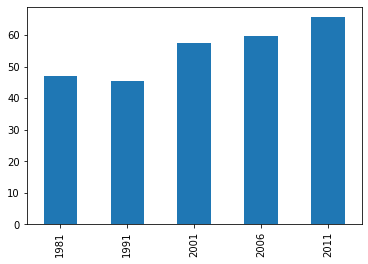

In [ ]:
df_india_overal=df_india_literacy.iloc[:,4:].mean()
df_india_overal.plot.bar()

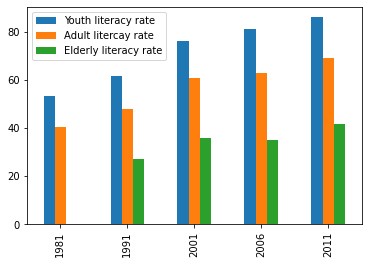

In [ ]:
df_inida_youth=df_india_literacy[df_india_literacy['Indicator Name'].str.contains('Youth')].mean()
df_inida_adult=df_india_literacy[df_india_literacy['Indicator Name'].str.contains('Adult')].mean()
df_india_elderly=df_india_literacy[df_india_literacy['Indicator Name'].str.contains('Elderly')].mean()
data={'Youth literacy rate':df_inida_youth,'Adult litercay rate':df_inida_adult,'Elderly literacy rate':df_india_elderly}
pd.concat(data,axis=1).plot.bar()

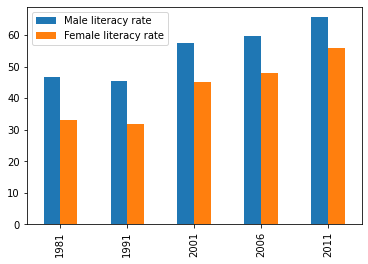

In [ ]:
df_inida_male=df_india_literacy[df_india_literacy['Indicator Name'].str.contains('male')].mean()
df_inida_female=df_india_literacy[df_india_literacy['Indicator Name'].str.contains('female')].mean()
data={'Male literacy rate':df_inida_male,'Female literacy rate':df_inida_female}
pd.concat(data,axis=1).plot.bar()

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



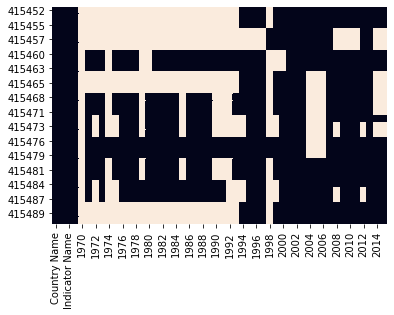

In [ ]:
df_india_enrolment=df_india_p.dropna(how='all',subset=list(df_india_p.iloc[:,4:50]))
df_india_enrolment=df_india_enrolment[df_india_enrolment['Indicator Name'].str.contains("Gross enrolment")]
df_india_enrolment=df_india_enrolment[df_india_enrolment['Indicator Name'].isin(list(df_india_enrolment['Indicator Name'].value_counts()[:200].index))]
df_india_enrolment=df_india_enrolment[df_india_enrolment['Indicator Name'].str.contains("(%)")]
sns.heatmap(df_india_enrolment.isnull(),cbar=False)

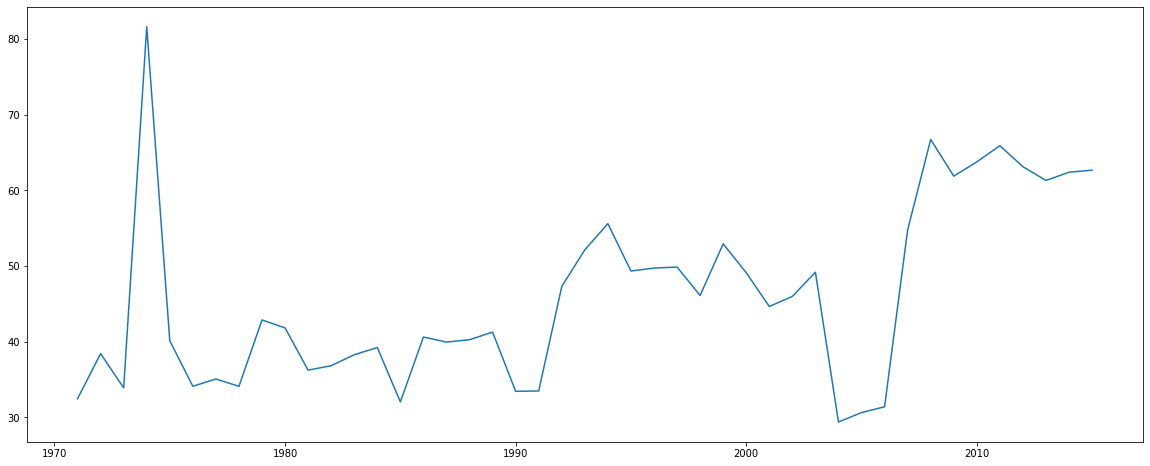

In [ ]:
df_india_enrolment_overal=df_india_enrolment.iloc[:,4:].mean()
df_india_enrolment_overal.plot.line(figsize=(20,8))

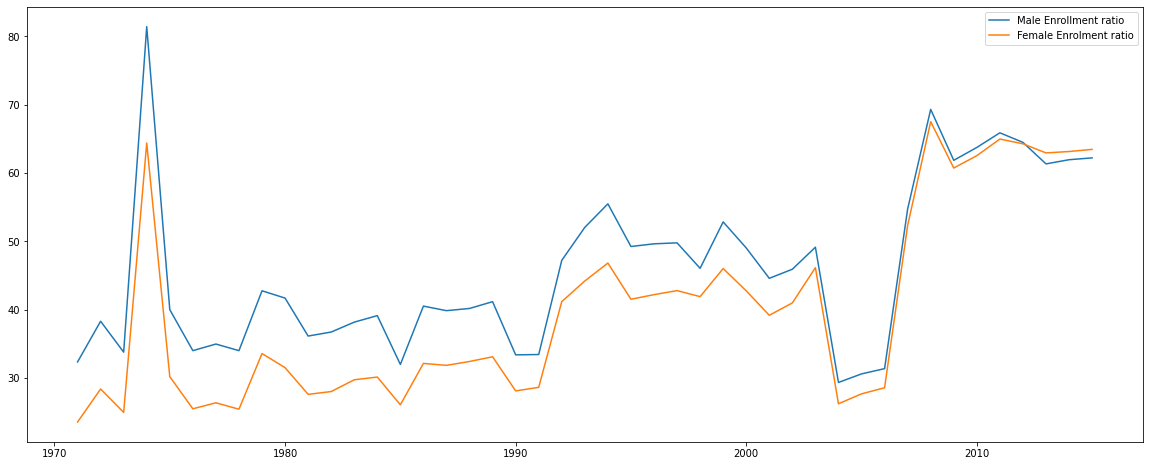

In [ ]:
df_india_enrol_male=df_india_enrolment[df_india_enrolment['Indicator Name'].str.contains("male")].mean()
df_inida_enrol_female=df_india_enrolment[df_india_enrolment['Indicator Name'].str.contains("female")].mean()
data={'Male Enrollment ratio':df_india_enrol_male,'Female Enrolment ratio':df_inida_enrol_female}
pd.concat(data,axis=1).plot.line(figsize=(20,8))

In [ ]:
df_india_fmean=df_india_f.dropna( how='all',subset=list(df_india_f.iloc[:,4:21]))
df_india_fmean=df_india_fmean[df_india_fmean['Indicator Name'].str.contains("Mean years")]
df_india_fmean.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
417494,India,IND,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.0T19.FE,2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.7,2.8,2.8,2.9,2.9,2.9,3.0,3.0,3.1,3.0
417495,India,IND,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.0T19.MA,2.1,2.2,2.3,2.4,2.5,2.5,2.6,2.7,2.8,2.8,2.9,2.9,2.9,3.0,3.0,3.1,3.0
417496,India,IND,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.0T19.MF,2.0,2.2,2.3,2.4,2.5,2.5,2.6,2.7,2.8,2.8,2.9,2.9,2.9,3.0,3.0,3.1,3.0
417497,India,IND,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.15UP.FE,6.1,6.7,7.2,7.7,8.2,8.7,9.1,9.6,10.0,10.4,10.8,11.1,11.4,11.7,12.0,12.3,12.5
417499,India,IND,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.15UP.MA,7.9,8.3,8.6,9.0,9.3,9.7,10.0,10.3,10.6,10.9,11.2,11.5,11.8,12.0,12.3,12.5,12.7


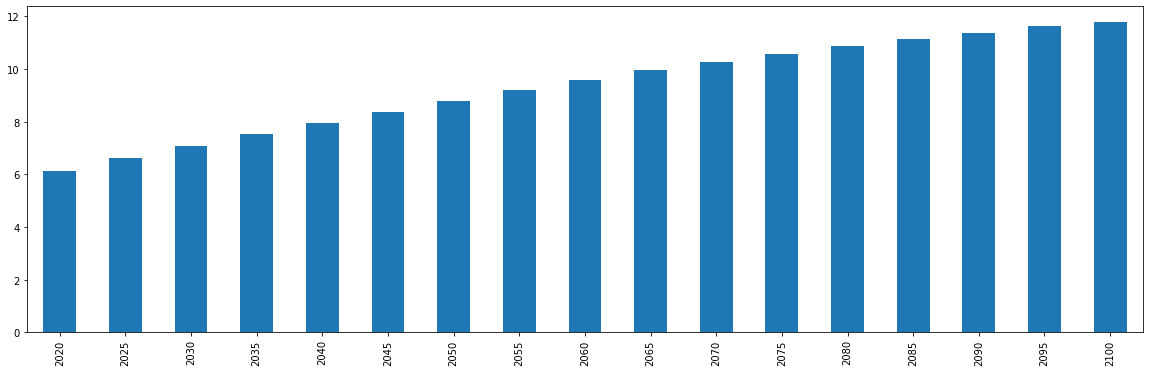

In [ ]:
df_india_fmean.mean().plot.bar(figsize=(20,6))

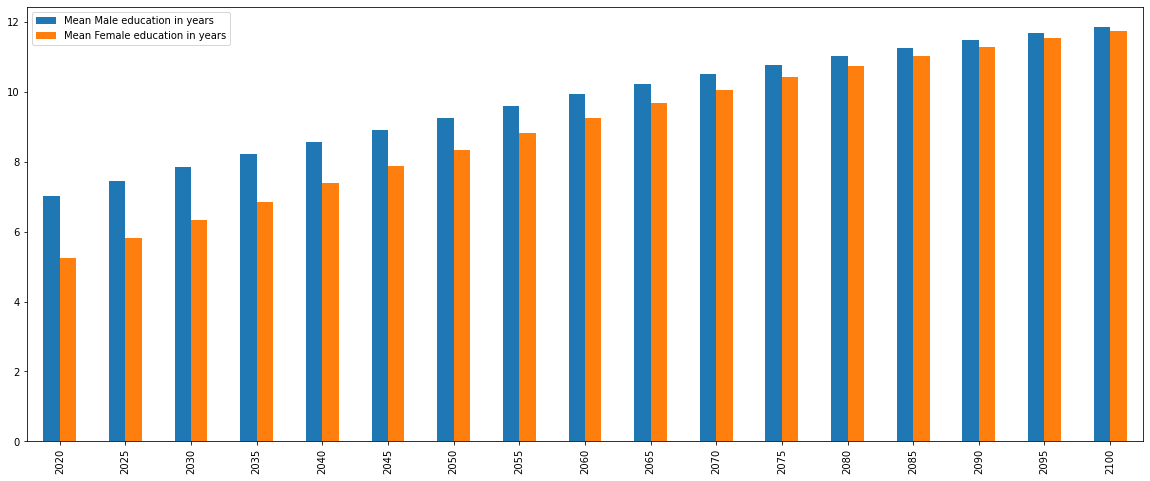

In [ ]:
df_india_fmean_male=df_india_fmean[df_india_fmean['Indicator Name'].str.contains("Male")].mean()
df_india_fmean_female=df_india_fmean[df_india_fmean['Indicator Name'].str.contains("Female")].mean()
data={'Mean Male education in years':df_india_fmean_male,'Mean Female education in years':df_india_fmean_female}
pd.concat(data,axis=1).plot.bar(figsize=(20,8))

Conclusion

As one can see that in first two time zones which are 1975 to 1990 and 1990 to 1999, very less number
of countries reported literacy rates. From the reported values, south americal is obserserved to have good literacy rates over asia and africa. but from time 
zone two and three, we can conclude that literacy rates are hifg in central asia and europe. In all time zones, europe and central asia reported highest literacy rates and sub saharan africa
reported lowest literacy rates. one can see that there is almost no change in the pattern. order of regions in literacy rates is almost same. east asia pacific
and latin america caribean are having almost same literacy rates over three time zones. From the plots we can observe that central asia and
south america had grown fast in enrolment ratio as africa and south asia are reorted very slow growth. North america and australia reported higest mean years of education followed by europe, central asia and south america. africa has lowest mean years 
of education. 

youth literacy rate is higer than 
adult literacy rate and elderly literacy rate in india. all the rates kept increasing over the years. next bar plot illustartes male versus female literacy rates over years.
from this bar plot we can see male literacy rates are higher than female literacy rates and both the rates kept increasing over the time.Coming to the enrolment analysis in india, It has seen so many fluctuations due to lack of data and irregular reporting. Many enrolment indicators are reported 
in irregular time intervals. India has seen it's higest enrolment ratio in 1974 and lowest in 2004.mean years of
education for males is higher than females over entire period but growth in mean years of education is higher for females. which means it is predicted that
female education time will be reaching close to male education time by 2100. 